In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Module 1: Importing Data Sets¶

In [2]:
# os.listdir('../IBM Data Analysis_Coursera/archive')

In [3]:
# df=pd.read_csv('../IBM Data Analysis_Coursera/archive/kc_house_data.csv')
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [6]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# df.describe(include='object')

### Module 2: Data Wrangling

we have to convert initial data format into a format that can be better for analysis.

'id' and 'Unnamed: 0' are not any significant parameter which will going to help for our project so for clearity droping them would be better option

In [8]:
df.drop(['id','Unnamed: 0'],axis=1,inplace=True) # To drop id and Unnamed: 0

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Identify and handle missing values

Data which contaion missing value can cause serious problem when building model to predict future trends so we have to handle them before we use them to built a model

First Let's check the null value 

In [10]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [11]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [12]:
# There are 13 and 10 data missing from bedrooms and bathrooms column respectively.
df['bedrooms'].dtypes

dtype('float64')

In [13]:
df[['bedrooms','bathrooms']].describe()

,bedrooms,bathrooms
count,21600.000000,21603.000000
mean,3.372870,2.115736
std,0.926657,0.768996
min,1.000000,0.500000
25%,3.000000,1.750000
50%,3.000000,2.250000
75%,4.000000,2.500000
max,33.000000,8.000000


By looking at describe method we can see that there must be outlier in these data because median of data is far far from
the maximum value so we have to test outlier by iqr outlier method

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

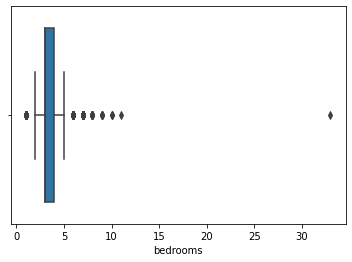

In [14]:
sns.boxplot(df['bedrooms'])

In [15]:
def iqr_outliers(df):
    out=[]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(1)
        else:
            out.append(0)
    return out

In [16]:
#outliers in bedrooms
df_bed = df['bedrooms']
outliers = iqr_outliers(df_bed)
df_bed1 = pd.DataFrame(df_bed)
df_bed2 = pd.DataFrame(outliers, columns =['Outliers'])
df_bed3 = pd.concat([df_bed1,df_bed2], axis=1)
df_bed3.Outliers.value_counts()

0    21080
1      533
Name: Outliers, dtype: int64

In [17]:
df_bath = df['bathrooms']
outliers = iqr_outliers(df_bath)
df_bath1 = pd.DataFrame(df_bath)
df_bath2 = pd.DataFrame(outliers, columns =['Outliers1'])
df_bath3 = pd.concat([df_bath1,df_bath2], axis=1)
df_bath3.Outliers1.value_counts()

0    21052
1      561
Name: Outliers1, dtype: int64

In [18]:
import plotly.graph_objects as go

In [19]:
for i in range(len(df_bed3)):
    if df_bed3.loc[i]['Outliers'] == 1:
        df_bed3.loc[i]['Outliers'] = df_bed3.iloc[i]['bedrooms']

C:\Users\gahat\AppData\Local\Temp\ipykernel_9244\692634229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bed3.loc[i]['Outliers'] = df_bed3.iloc[i]['bedrooms']


In [20]:
# fig = go.Figure(data=go.Scatter(x=df_bed3.index, 
#                                 y=df_bed3['bedrooms'],
#                                 marker_color='black'))
# fig.update_layout({"title": 'Anomaly Detection',
#                    "xaxis": {"title":"Bedrooms"},
#                    "yaxis": {"title":"Log Volume"},
#                    "showlegend": False})
# fig.add_traces(go.Scatter(x=df_bed3.index, y=df_bed3['Outliers'],
#                           textposition='top left',
#                           textfont=dict(color='#233a77'),
#                           mode='markers+text',
#                           marker=dict(color='red', size=6),
#                           ))
# fig.show()


In [21]:
# Visulaization code for outliers of bathroom is same

#### IMPUTATION

 We can  use trimming at both ends to remove outliers using median.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


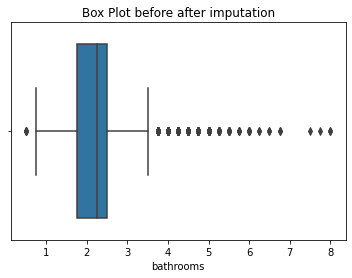

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


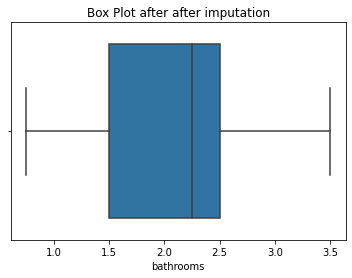

In [22]:
# Median imputation for bathrooms
sns.boxplot(df['bathrooms'])
plt.title("Box Plot before after imputation")
plt.show()
q1 = df['bathrooms'].quantile(0.25)
q3 = df['bathrooms'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['bathrooms'])
for i in df['bathrooms']:
    if i > Upper_tail or i < Lower_tail:
            df['bathrooms'] = df['bathrooms'].replace(i, m)
sns.boxplot(df['bathrooms'])
plt.title("Box Plot after after imputation")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


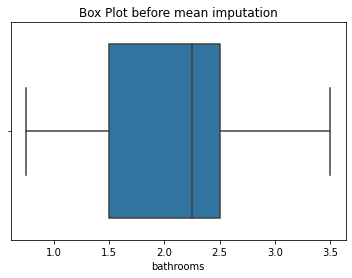

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


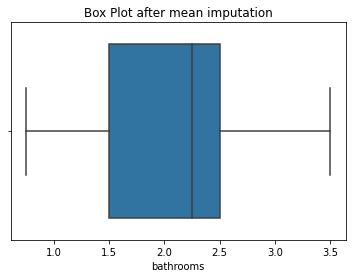

In [23]:
# Median imputation for price
sns.boxplot(df['bathrooms'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df['bathrooms'].quantile(0.25)
q3 = df['bathrooms'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['bathrooms'])
for i in df['bathrooms']:
    if i > Upper_tail or i < Lower_tail:
            df['bathrooms'] = df['bathrooms'].replace(i, m)
sns.boxplot(df['bathrooms'])
plt.title("Box Plot after mean imputation")
plt.show()

In [24]:
df[['bedrooms','bathrooms']].describe()

,bedrooms,bathrooms
count,21600.000000,21042.000000
mean,3.372870,2.059049
std,0.926657,0.686137
min,1.000000,0.750000
25%,3.000000,1.500000
50%,3.000000,2.250000
75%,4.000000,2.500000
max,33.000000,3.500000


Now we can fill null value using median for both bedrooms and bathrooms. We didn't use mean() because of room can't be fractional number

In [25]:
median_bed=df['bedrooms'].median()
median_bath=df['bathrooms'].median()

In [26]:
df['bedrooms'].replace(np.nan,median_bed,inplace=True)
df['bathrooms'].replace(np.nan,median_bath,inplace=True)

In [27]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Finally we dealt with missing value and outliers now we can do exploratory data analysis

### Module 3: Exploratory Data Analysis

In [28]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Lets check correlation of columns to visualize how they are related with each other

In [29]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308868,0.383568,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308868,1.000000,0.464816,0.578147,0.032253,0.177803,-0.006778,0.080031,0.026898,0.356770,0.479287,0.303001,0.155635,0.018506,-0.153678,-0.009650,0.130862,0.393319,0.030310
bathrooms,0.383568,0.464816,1.000000,0.641915,0.060945,0.503448,0.032397,0.137580,-0.125343,0.602394,0.587245,0.233336,0.532608,0.035148,-0.214003,0.007146,0.236763,0.520427,0.058789
sqft_living,0.702035,0.578147,0.641915,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.032253,0.060945,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.177803,0.503448,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006778,0.032397,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.080031,0.137580,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.026898,-0.125343,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356770,0.602394,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


##### for better visualization we can use sns heatmap

<AxesSubplot:>

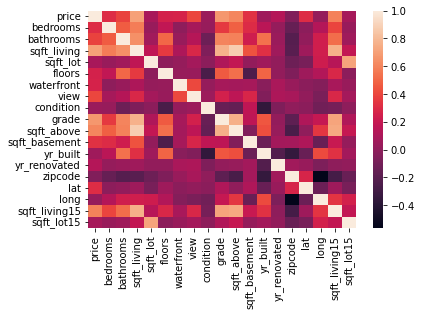

In [30]:
sns.heatmap(df.corr())

##### Lets just select the numerical features

In [31]:
df.dtypes.value_counts()

int64      13
float64     6
object      1
dtype: int64

In [32]:
df_num=df.select_dtypes(include=['int64','float64'])

In [33]:
df_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      

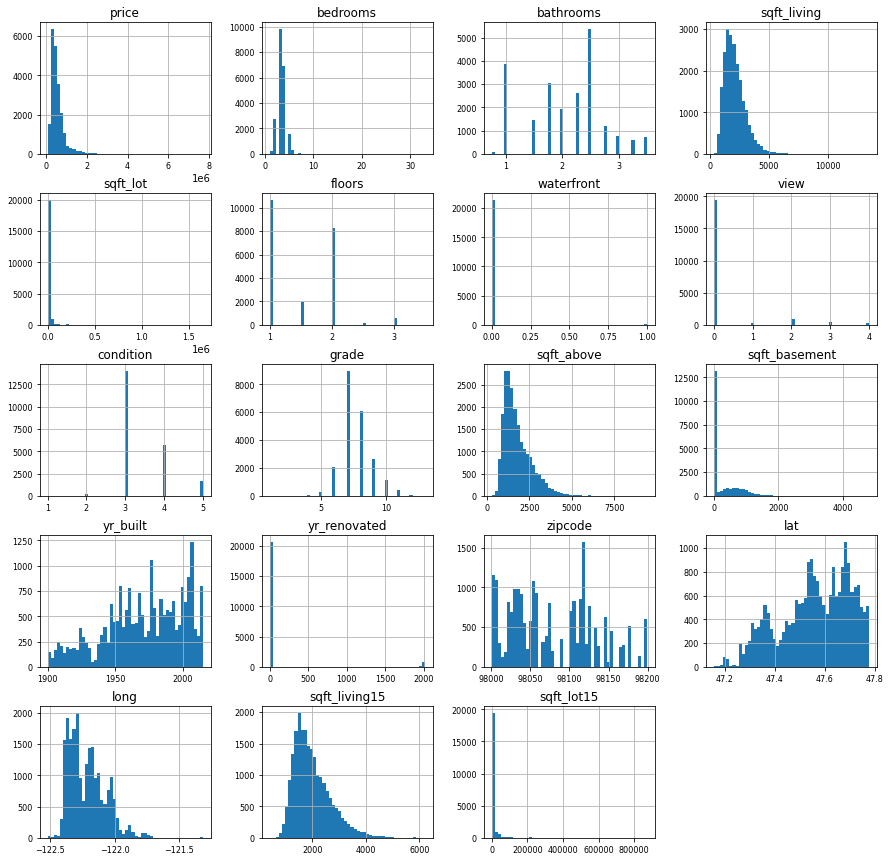

In [34]:
df_num.hist(figsize=(15,15),bins=50,xlabelsize=8, ylabelsize=8)

Lets look at the correlation between the independent variable with target(price)

In [35]:
df_num_corr=df_num.corr()['price'][1:]
df_num_corr=df_num_corr.sort_values(ascending=False)
print('correlation between the independent variable with target(price): \n{}'.format(df_num_corr))

correlation between the independent variable with target(price): 
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
view             0.397293
bathrooms        0.383568
sqft_basement    0.323816
bedrooms         0.308868
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64


In [36]:
df_num_corr_most=df_num_corr[abs(df_num_corr)>0.5].sort_values(ascending=False)
print("There is {} strongly correlated independent values with Price:\n{}".format(len(df_num_corr_most), df_num_corr_most))

There is 4 strongly correlated independent values with Price:
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
Name: price, dtype: float64


<AxesSubplot:>

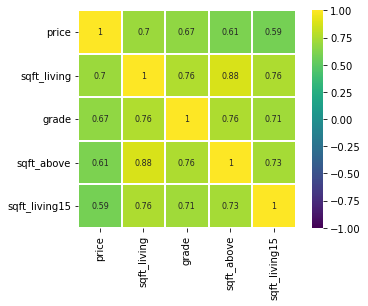

In [37]:
most_corr=df_num[['price','sqft_living','grade','sqft_above','sqft_living15']]
most_corr_value=most_corr.corr()
sns.heatmap(most_corr_value,cmap='viridis',vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, 
           annot_kws={"size": 8}, square=True)

##### Its always better to visualize our data using  plot so we are going plot a pairplot which will helps us better to choose the most significant data

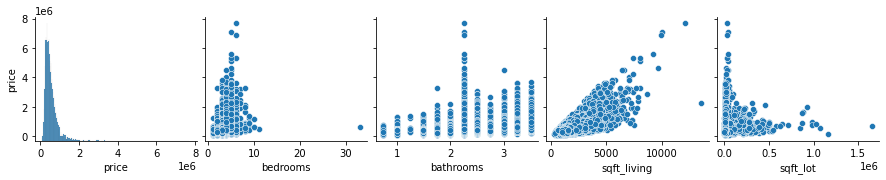

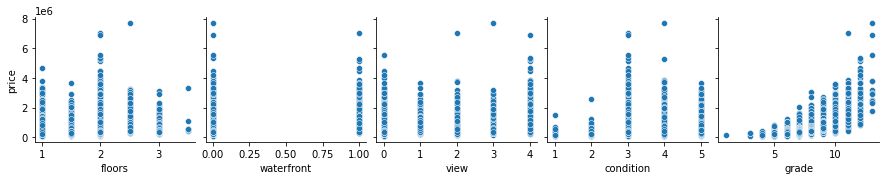

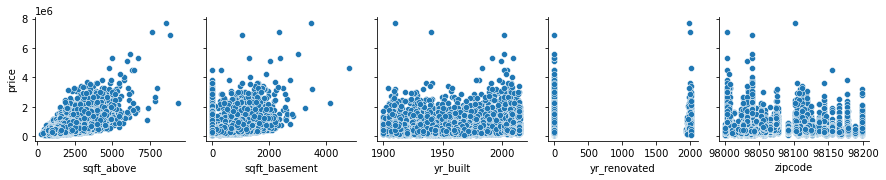

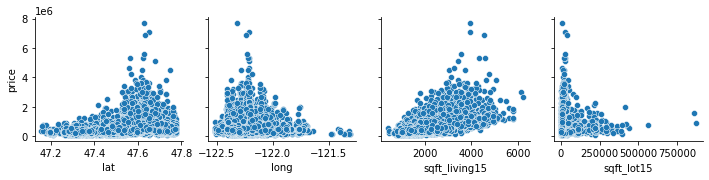

In [38]:
for i in range(0,len(df_num.columns),5):
    sns.pairplot(data=df_num,x_vars=df_num.columns[i:i+5],y_vars='price')

##### Now by both tabluar data and plot data we got 4 strongly correlated independent columns with the price. and they are 1.sqft_living, 2.grade, 3.sqft_above, 4.sqft_living15

Feature to feature relationship

In [39]:
df_high_cor=df_num[['sqft_living','grade','sqft_above','sqft_living15']]

In [40]:
cor=df_high_cor.corr()

<AxesSubplot:>

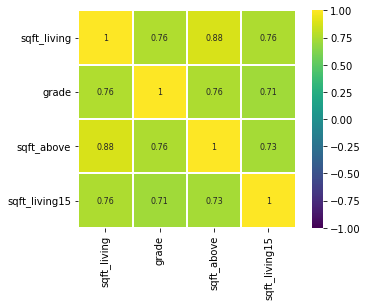

In [41]:
sns.heatmap(cor,cmap='viridis',vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, 
           annot_kws={"size": 8}, square=True)

Lets plot regression plot of most correlated independent data with price

In [42]:
# fig,axes =plt.subplots(round(len(df_num.columns)/3),3,figsize=(14,32))
# for i, ax in enumerate(fig.axes):
#     if i< len(df_num):
#         sns.regplot(x=df_num.columns[i],y='price',data=df_num,ax=ax)
        
# fig.tight_layout()

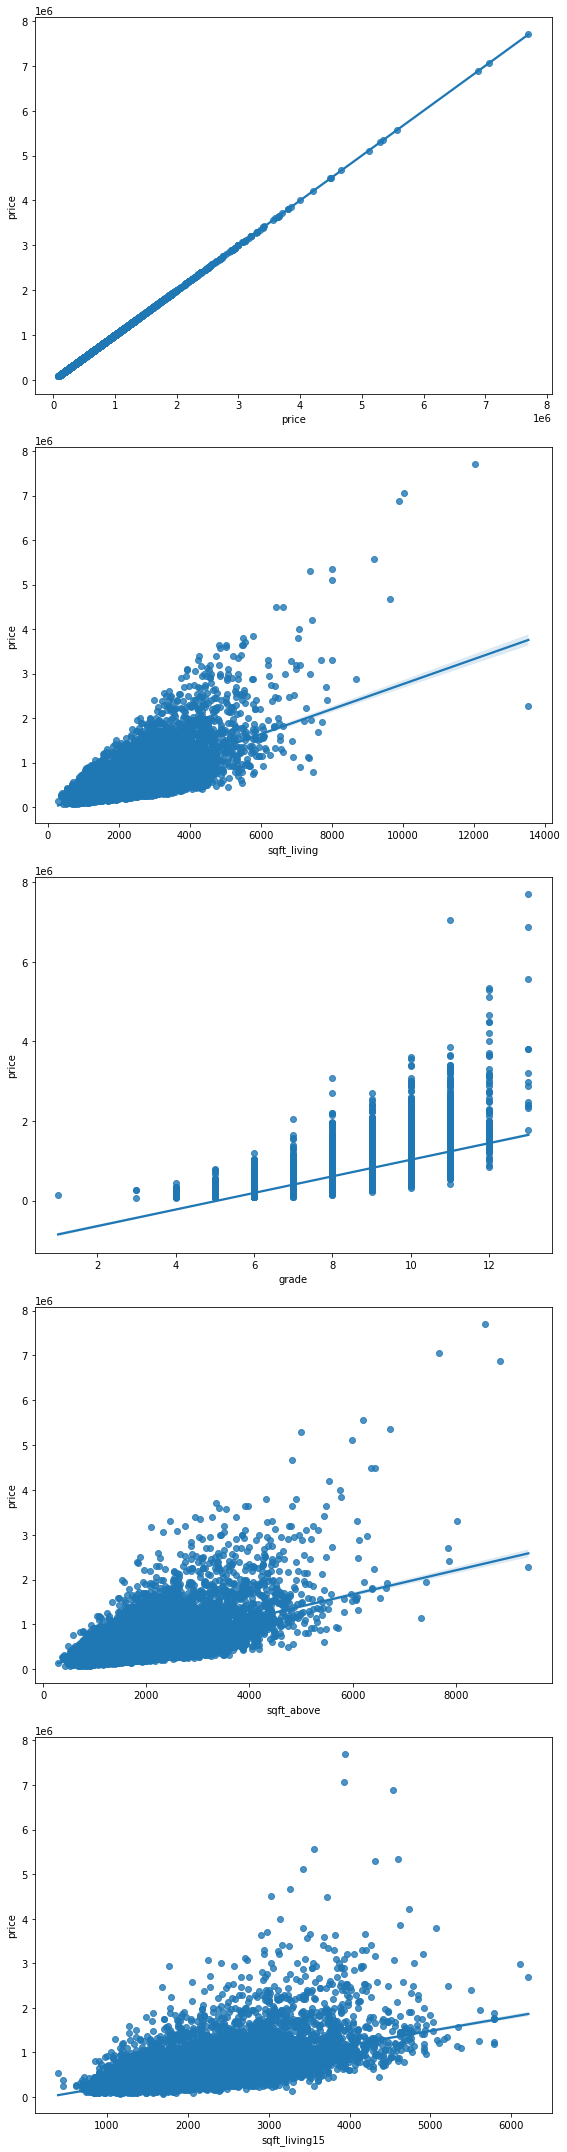

In [43]:
fig,axes =plt.subplots(round(len(most_corr.columns)),figsize=(8,30))
for i, ax in enumerate(fig.axes):
    if i< len(most_corr):
        sns.regplot(x=most_corr.columns[i],y='price',data=most_corr,ax=ax)
        
fig.tight_layout()

### Module 4: Model Development

#### Linear Regression and Multiple Linear Regression

Lets see our model using liner regression model and then multiple linear regression

In [44]:
lr=LinearRegression()

In [45]:
Y=df['price']

In [46]:
lr.fit(df[['sqft_living']],Y)
lr.score(df[['sqft_living']],Y)

0.4928532179037931

In [47]:
lr.fit(df[['grade']],Y)
lr.score(df[['grade']],Y)
price=lr.predict(df[['grade']])
print('Actual Price:\n{} \n Predcited price\n {}'.format(df['price'][:5],price[:5]))

Actual Price:
0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64 
 Predcited price
 [403157.96019888 403157.96019888 194700.3977405  403157.96019888
 611615.52265726]


In [48]:
Z=df[['sqft_living','grade','sqft_above','sqft_living15']]

In [49]:
lr.fit(Z,Y)
price1=lr.predict(Z)
price1[:5]

array([298899.89457466, 543157.88332606, 169830.79596414, 487423.33983943,
       489363.06793134])

In [50]:
lr.score(Z,Y)

0.5419589651239656

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


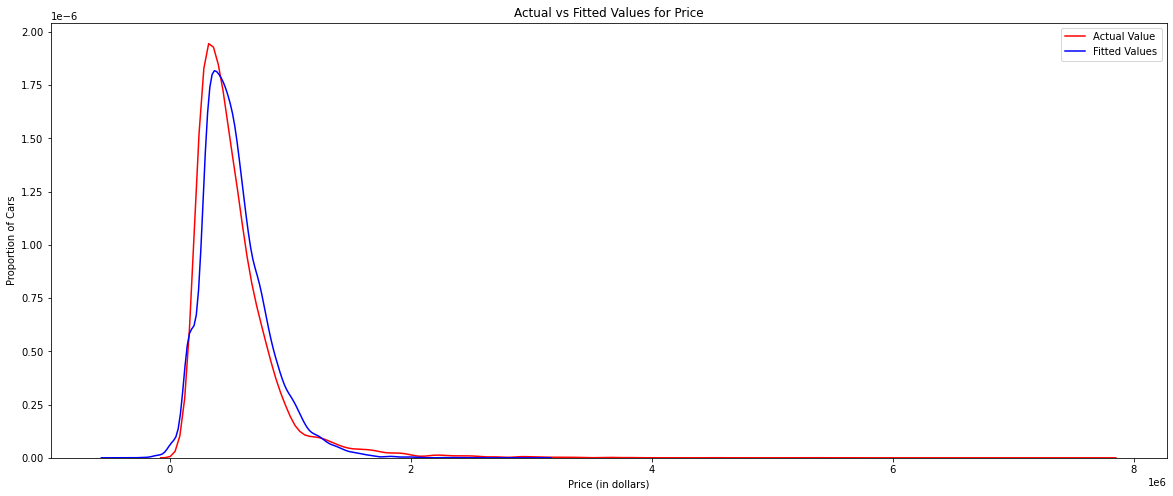

In [51]:
plt.figure(figsize=(20, 8))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(price1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()

plt.show()
plt.close()

In [52]:
from sklearn.metrics import r2_score

#### Pipeline

In [53]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [54]:
y=df['price']

In [55]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [56]:
Z=Z.astype('float')

In [57]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [58]:
Y_hat=pipe.predict(Z)
Y_hat[:6]

array([ 331859.55551063,  474927.17496393,  507724.04242733,
        408883.67594009,  451987.17178729, 2017595.37692575])

In [59]:
y[:6]

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1225000.0
Name: price, dtype: float64

In [60]:
pipe.score(Z,y)

0.6208568981132567

Lets use all the independent variable to predict price using pipeline method

In [61]:
features =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]     

In [62]:
y=df['price']
pipe=Pipeline(Input)
pipe.fit(features,y)
Y_hat=pipe.predict(features)
print('Price predicted by pipline upto 6th row is:\n{}'.format(Y_hat[:6]))
r_squqred=pipe.score(features,y)
print('R^2 value of pipeline model is:\n{}'.format(r_squqred))

Price predicted by pipline upto 6th row is:
[ 352020.5    557252.375  457362.5    416768.75   513146.    2009803.5  ]
R^2 value of pipeline model is:
0.7505307255459607


### Module 5: Model Evaluation and Refinement

we have to implement our model in predicting the value  which we don't know yet so we have to split the data into trainig sample and testing sample thus we can refine our model

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [64]:
def Distribution_Plot(Actual_Function,Predicted_Function,Actual_Name,Predicted_Name,Title):
    plt.figure(figsize=(20,8))
    ax=sns.distplot(Actual_Function,hist=False,color='r',label='Actual_Name')
    sns.distplot(Predicted_Function,hist=False,color='b',label='Predicted_Name',ax=ax)
    plt.title(Title)
    plt.legend()
    plt.xlabel('Price is $')
    plt.ylabel('Proportion of Houses')
    plt.show()
    plt.close()

In [65]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [66]:
lr.fit(x_train[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]],y_train)

LinearRegression()

In [67]:
Yhat_train=lr.predict(x_train[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]])

In [68]:
Yhat_train[:5]

array([290337.23455446, 355083.23455446, 215562.73455446, 789270.73455446,
       531150.73455446])

In [69]:
Yhat_test=lr.predict(x_test[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]])

In [70]:
Yhat_test[:5]

array([644828.73455446, 470106.73455446, 873795.73455446, 701690.73455446,
       266184.73455446])

##### Lets compare predietd and actual price from the training set

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


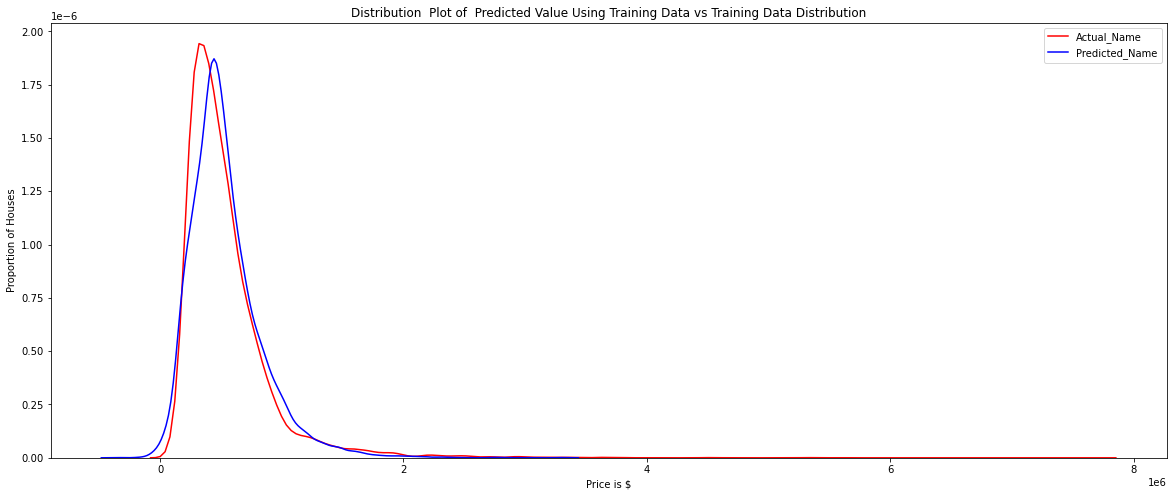

In [71]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(y_train, Yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [72]:
lr.score(x_train[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]],y_train)

0.6671879792738333

##### Now Lets compare predietd and actual price from the testing set

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


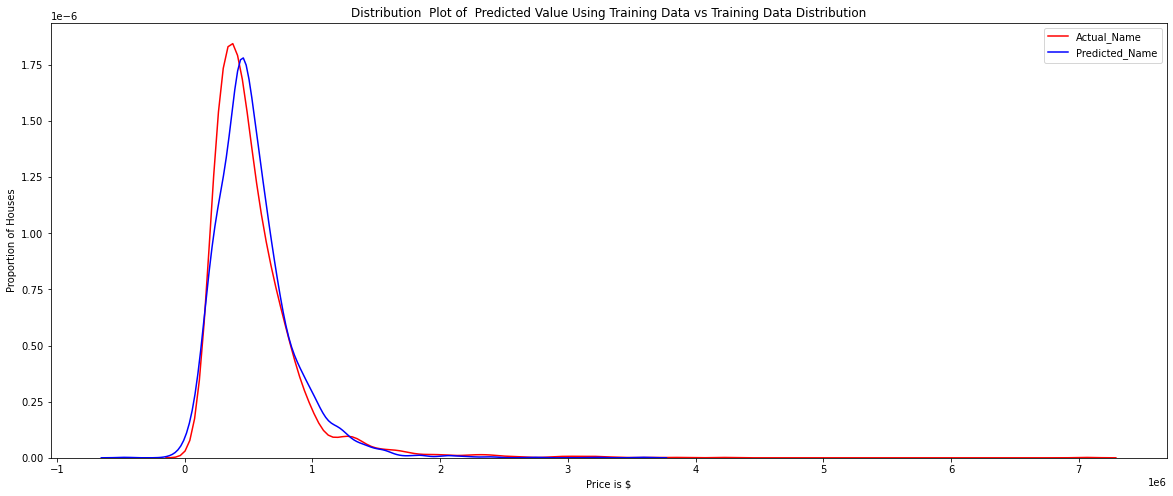

In [73]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(y_test, Yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [74]:
lr.score(x_test[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]],y_test)

0.6572822684516676

#### Ridge Regression

we will review Ridge Regression and see how the parameter alpha changes the model.

In [75]:
from sklearn.linear_model import Ridge

In [76]:
pr=PolynomialFeatures(degree=3)

In [77]:
x_train_pr=pr.fit_transform(x_train[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]])
x_test_pr=pr.fit_transform(x_test[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]])

In [78]:
RidgeModel=Ridge(alpha=0.1)

Train

In [79]:
RidgeModel.fit(x_train_pr,y_train)

Ridge(alpha=0.1)

In [80]:
train_price = RidgeModel.predict(x_train_pr)

In [81]:
train_price[:5]

array([344426.40642953, 325774.5919764 , 259098.84392953, 742206.13592172,
       544487.32732797])

In [82]:
y_train[:5]

17801    427000.0
20764    380000.0
2285     225000.0
13350    681716.0
19376    440000.0
Name: price, dtype: float64

In [83]:
RidgeModel.score(x_train_pr,y_train)

0.7914042200792679

Test

In [84]:
test_price = RidgeModel.predict(x_test_pr)

In [85]:
print('Predicted:\n',test_price[:5])
print('Actual:\n',y_test[:5].values)

Predicted:
 [595142.02752328 460572.32732797 847469.48064828 677647.18377328
 339448.5660975 ]
Actual:
 [ 459000.  445000. 1057000.  732350.  235000.]


In [86]:
RidgeModel.score(x_test_pr,y_test)

0.5486091212862976

##### Lets try with our most correlated data set

In [87]:
pr1=PolynomialFeatures(degree=2)

In [88]:
z=['sqft_living','grade','sqft_above','sqft_living15']
Z=df[z]

In [89]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(Z, Y, test_size=0.25, random_state=1)

In [90]:
x_train_pr1=pr1.fit_transform(x_train1[z],y_train1)
x_test_pr1=pr1.fit_transform(x_test1[z],y_test1)

In [91]:
RidgeModel=Ridge(alpha=1)

In [92]:
RidgeModel.fit(x_train_pr1,y_train1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.8476e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=1)

In [93]:
Ytest_price=RidgeModel.predict(x_test_pr1)
Ytest_price[:5]

array([ 701322.13971526,  398431.84917777, 1003490.87785707,
        633780.74501053,  307157.22640905])

In [94]:
y_test1[:5]

15544     459000.0
17454     445000.0
21548    1057000.0
3427      732350.0
8809      235000.0
Name: price, dtype: float64

In [95]:
RidgeModel.score(x_test_pr1,y_test1)

0.6410515100624252

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


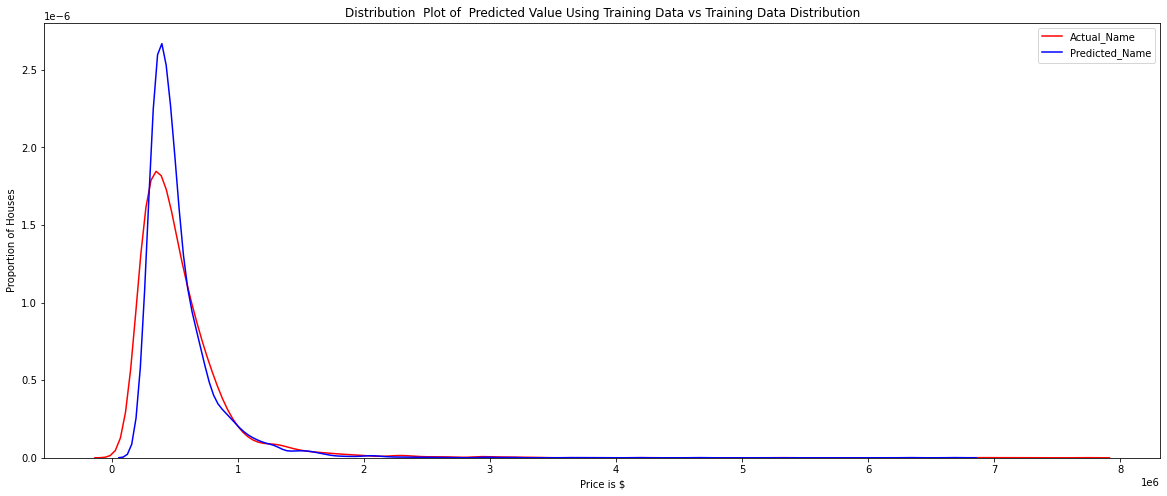

In [96]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(y_test1, Ytest_price, "Actual Values (Train)", "Predicted Values (Train)", Title)

### Random Forests

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [99]:
# Specify Model
forest_model = RandomForestRegressor(random_state=1)

In [100]:
# Fit Model
forest_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [106]:
predicted_test_value=forest_model.predict(x_test)

In [107]:
predicted_test_value[:5]

array([456408.1 , 419595.5 , 661852.76, 681464.38, 245721.  ])

In [108]:
predicted_train_value=forest_model.predict(x_train)

In [110]:
predicted_train_value[:5]

array([442550.5 , 348791.5 , 227264.  , 683685.39, 444662.78])

In [111]:
y_train[:5]

17801    427000.0
20764    380000.0
2285     225000.0
13350    681716.0
19376    440000.0
Name: price, dtype: float64

In [115]:
R2_train=forest_model.score(x_train,y_train)

In [116]:
R2_train

0.9738444268886636

In [117]:
R2_test=forest_model.score(x_test,y_test)

In [118]:
R2_test

0.7740290064844879

In [159]:
mse=mean_absolute_error(y_test,predicted_test_value)
mse

91476.44071481448

Underfitting and Overfitting

In [120]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [148]:
def get_mae(max_leaf_nodes, x_train1, x_test1, y_train1, y_test1):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(x_train1, y_train1)
    preds_val = model.predict(x_test1)
    mae = mean_absolute_error(y_test1, preds_val)
    return(mae)

In [150]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes,x_train1, x_test1, y_train1, y_test1)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  173163
Max leaf nodes: 50  		 Mean Absolute Error:  156240
Max leaf nodes: 500  		 Mean Absolute Error:  160893
Max leaf nodes: 5000  		 Mean Absolute Error:  192879


#### Generate test predictions

In [151]:
predicted_test_value

array([456408.1 , 419595.5 , 661852.76, ..., 609543.46, 648021.27,
       350125.9 ])

In [152]:
# Save predictions in format 
output = pd.DataFrame({'Id': x_test.index,
                       'SalePrice': predicted_test_value})

In [156]:
# output.to_csv('submission.csv', index=False)